# CAPSTONE 3 - TELCO CUSTOMER CHURN
# HANDIKA EKI WINATA

## 1. DATA UNDERSTANDING
---

### Background

In the competitive landscape of the telecommunications industry, understanding customer churn — the tendency of customers to cease doing business with a company — is pivotal for sustaining growth. Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company or service. In the context of the telecommunications industry, it refers to subscribers who decide to move their business from one service provider to another. Churn can occur for a variety of reasons including dissatisfaction with service quality, better offers from competitors, changes in the customer's personal circumstances, among others.

The "Telco Customer Churn" dataset offers a deep dive into the profiles of individuals who have discontinued their services with a telco company. This dataset encompasses a variety of features including the tenure of the customer with the company, the nature of services subscribed to, and the type of contract held, among others. Central to our analysis is the 'Churn' variable, an indicator that reveals whether a customer has decided to end their relationship with the company.

> Target:

0 : Not Churn (Retained)

1 : Churn (Turnover)

### Problem Statement

Our objective is to unravel the patterns and trends that dictate customer churn, leveraging the rich data available to build a predictive model that can accurately identify potential churn customers. The overarching question guiding this analysis is, "What are the key determinants of customer churn, and how can we utilize this information to predict potential churn accurately?". By answering this question, this project aims to empower telco companies with the insights necessary to devise strategies that foster long-lasting relationships with their customer base, thereby reducing churn and promoting customer loyalty. One of the known key business metrics is `The cost of retaining an existing customer is far less than acquiring a new one`

### Data DIctionary

| # | Feature | Description
| --- | --- | ---
| 1 | Dependents | Whether the customer has dependents or not
| 2 | tenure | Number of months the customer has stayed with the company
| 3 | OnlineSecurity | Whether the customer has online security or not
| 4 | OnlineBackup | Whether the customer has online backup or not
| 5 | InternetService | Whether the client is subscribed to Internet service
| 6 | DeviceProtection | Whether the client has device protection or not
| 7 | TechSupport | Whether the client has tech support or not
| 8 | Contract | Type of contract according to duration
| 9 | PaperlessBilling | Bills issued in paperless form
| 10 | MonthlyCharges | Amount of charge for service on monthly bases
| 11 | Churn | 1 if the customer Churn, 0 otherwise

## DATA CLEANING
---

In [9]:
!pip install category_encoders

In [54]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

## sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.pipeline import make_pipeline

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # bagging
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier # boosting
# from catboost import CatBoostClassifier

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_validate, StratifiedKFold

# metrics untuk regresi
from sklearn.metrics import f1_score, classification_report, make_scorer, fbeta_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


### Null Values & Data Type Check

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


> No Null values found & Data types are in a correct format

### Duplicated Data

In [53]:
pd.set_option('display.max_rows', None)

df[df.duplicated()].sort_values('MonthlyCharges')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4499,No,4,No,No,No,No,No,Month-to-month,No,19.00,0
3565,No,1,No,No,No,No,No,Month-to-month,No,19.20,0
2612,No,72,No,No,No,No,No,Two year,No,19.30,0
3733,No,64,No,No,No,No,No,Two year,No,19.45,0
4456,No,1,No,No,No,No,No,Month-to-month,Yes,19.50,0
4615,Yes,59,No,No,No,No,No,Two year,No,19.50,0
3527,No,1,No,No,No,No,No,Month-to-month,No,19.55,0
1881,No,1,No,No,No,No,No,Month-to-month,Yes,19.60,1
3937,Yes,15,No,No,No,No,No,One year,No,19.65,0
624,No,1,No,No,No,No,No,Month-to-month,No,19.65,0


> There are few duplicates data but after observing them, they are actually having the same value in several features only and since the Customer ID is not provided in this data, it can be concluded that the duplicated data will be left as it be

### Unique Values

In [16]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


> `No internet service` value in several features can be classified as `No` since they are pointing the same meaning. Thus, replacement will be done to avoid missunderstanding

In [17]:
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']].replace({'No internet service' : 'No'})

In [18]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


> Now the unique values are more simplified

In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dependents,4930,2,No,3446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,4930.0,NaN,NaN,NaN,32.401217,24.501193,0.0,9.0,29.0,55.0,72.0
OnlineSecurity,4930,2,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,4930,2,No,3224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,4930,3,Fiber optic,2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,4930,2,No,3238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,4930,2,No,3519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,4930,3,Month-to-month,2721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,4930,2,Yes,2957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,4930.0,NaN,NaN,NaN,64.883032,29.92396,18.8,37.05,70.35,89.85,118.65


In [20]:
# Define the income bins and labels
tenure_bins = [0, 12, 24, 36, 48, 60, float('inf')]  # Custom bin edges
tenure_labels = ['1y', '2y', '3y', '4y', '5y', '>5y']

# Add a new column for income categories
df['tenure_category'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

df['tenure_category'].value_counts()


1y     1452
>5y    1029
2y     726 
3y     618 
5y     587 
4y     518 
Name: tenure_category, dtype: int64

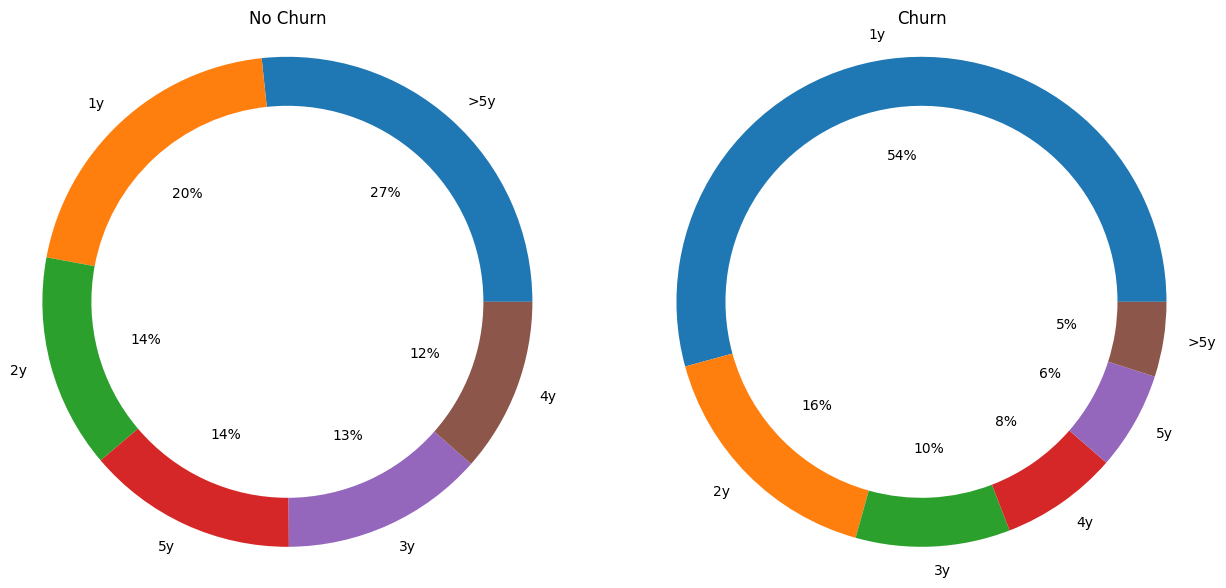

In [21]:
# Assuming df is your data frame and it has been properly loaded
tenure_churn_no = df[df['Churn'] == 'No']['tenure_category'].value_counts()
tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure_category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Adjusted subplot grid to 1 row and 2 columns

# Plot for Churn = No
axes[0].pie(
    tenure_churn_no,
    labels=tenure_churn_no.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2},
)
axes[0].set_title('No Churn')  # Set title for the first subplot
axes[0].axis('equal')  # Set axis to be equal for the first subplot

# Plot for Churn = Yes
axes[1].pie(
    tenure_churn_yes,
    labels=tenure_churn_yes.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2},
)
axes[1].set_title('Churn')  # Set title for the second subplot
axes[1].axis('equal');  # Set axis to be equal for the second subplot

# plt.tight_layout()
# plt.show()
# plt.savefig('problem_statement.png')  # Uncomment this line if you want to save the figure


In [22]:
df['Churn'].value_counts(), df['Churn'].value_counts() / len(df) * 100

(No     3614
 Yes    1316
 Name: Churn, dtype: int64,
 No     73.306288
 Yes    26.693712
 Name: Churn, dtype: float64)

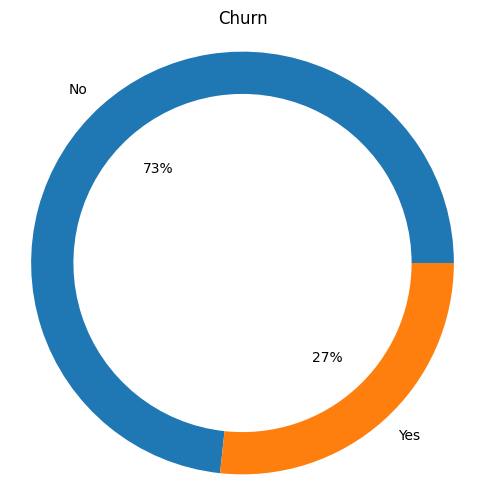

In [23]:
churn_count = df['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    churn_count,
    labels=churn_count.index,
    autopct='%1.0f%%',
    wedgeprops={'width': 0.2}  # Set the width of the hole to create a donut
)
plt.title('Churn')
plt.axis('equal');
# plt.savefig('problem_statement.png')

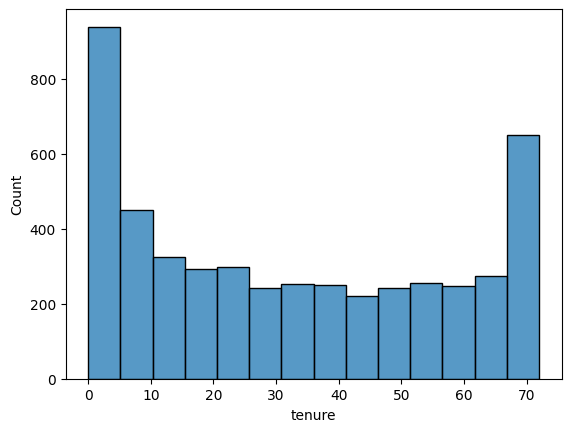

In [24]:
sns.histplot(df['tenure']);

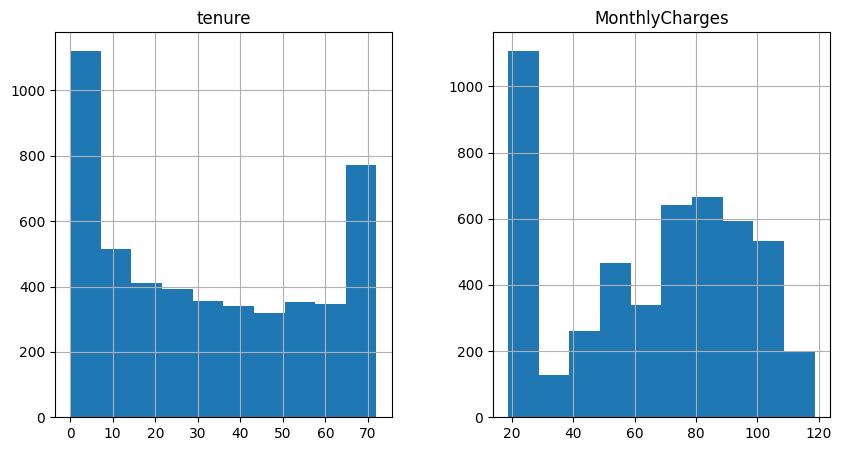

In [60]:
df.hist(figsize=(10,5));


In [32]:
df.drop(columns='tenure_category', inplace=True)

In [33]:
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O'))]
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [34]:
for i in cat_features:
    print(df[i].value_counts())
    print()

No     3446
Yes    1484
Name: Dependents, dtype: int64

No     3497
Yes    1433
Name: OnlineSecurity, dtype: int64

No     3224
Yes    1706
Name: OnlineBackup, dtype: int64

Fiber optic    2172
DSL            1706
No             1052
Name: InternetService, dtype: int64

No     3238
Yes    1692
Name: DeviceProtection, dtype: int64

No     3519
Yes    1411
Name: TechSupport, dtype: int64

Month-to-month    2721
Two year          1157
One year          1052
Name: Contract, dtype: int64

Yes    2957
No     1973
Name: PaperlessBilling, dtype: int64

No     3614
Yes    1316
Name: Churn, dtype: int64



In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [36]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O'))]
num_features

['tenure', 'MonthlyCharges']

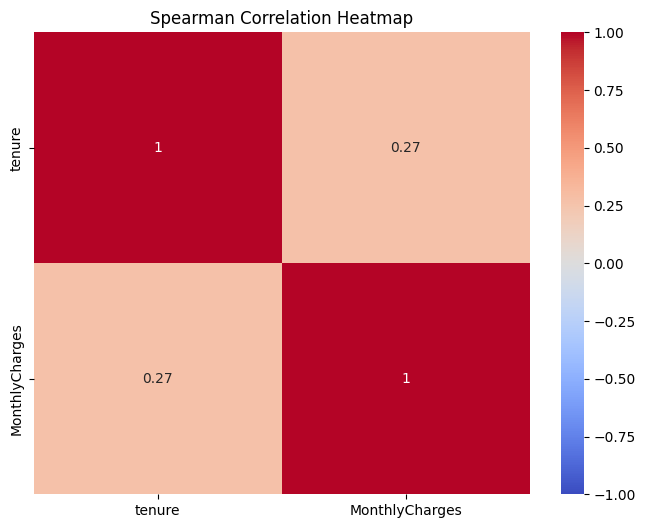

In [52]:
# cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']

correlations = df[num_features].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()

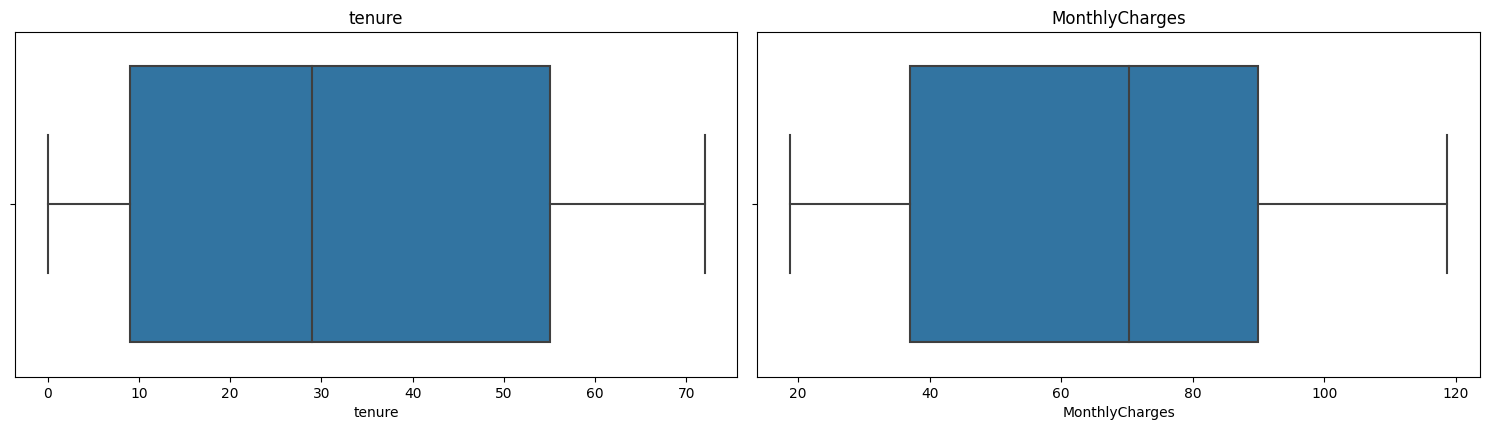

In [37]:
plotnumber = 1

plt.figure(figsize=(15,8))

for kolom in num_features:
    plt.subplot(2,2, plotnumber)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)
    plt.tight_layout()
    plotnumber = plotnumber + 1

plt.tight_layout()

### Define Case

- True Positives (TP): Customers who were predicted to churn and actually churned
- True Negatives (TN): Customers who were predicted not to churn and actually did not churn
- False Positives (FP): Customers who were predicted to churn but did not actually churn (Type I error)
- False Negatives (FN): Customers who were predicted not to churn but actually churned (Type II error).

## Preprocessing

### Data Split

In [38]:
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No,No,No,No,No,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [39]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [41]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [42]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [43]:
ordinal_mapping = [{'col':'Contract', 'mapping':{'Month-to-month':0,
                                       'One year':1,
                                       'Two year':2}}]

# transformer

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Contract'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['tenure', 'MonthlyCharges']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['Contract']),
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaperlessBilling']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['Contract']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

In [44]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Contract'],
                                                                 mapping=[{'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Month-to-month    0
One year          1
Two year          2
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['Contract']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

In [45]:
# 3 base model (Basic ML algorithm)
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

# 3 ensemble model
xgb = XGBClassifier(random_state = 42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)



In [46]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


# Define models
logreg_penalized = LogisticRegression(random_state=42, class_weight='balanced')
tree_penalized = DecisionTreeClassifier(random_state=42, class_weight='balanced')
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

# 3 ensemble model
xgb = XGBClassifier(random_state = 42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# estimators = [
#     ('tree', DecisionTreeClassifier(random_state=101)),
#     ('knn', KNeighborsClassifier()),
#     ('logreg', LogisticRegression(random_state=101)),
#     ('xgb', XGBClassifier(random_state = 42)),
#     ('rf', RandomForestClassifier(random_state=42)),
#     ('gboost', GradientBoostingClassifier(random_state=42))]

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()
smoteen = SMOTEENN(random_state=42)

# Define imbalance treatment methods
models = {'KNN': knn,
          'Logistic Regression':logreg,
          'Logistic Regression Penalized': logreg_penalized,
          'Decision Tree': tree,
          'Decision Tree Penalized': tree_penalized,
          'XGBoost' : xgb,
          'Random Forest' : rf,
          'Gradient Boosting' : gboost
          }

resample = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near': near,
    'smoteenn': smoteen
}

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_algo = []
list_resample = []


for name_resample,resample in resample.items():
    for name_algo,model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('transorm', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transorm', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_algo.append(name_algo)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())
        # print(f'{name_algo} with resample "{name_resample}" is completed')


model_bench = pd.DataFrame({
    'model': list_algo,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr
})

model_bench

,model,resample,accuracy,precision,recall,f1
0,KNN,none,0.694221,0.603762,0.510583,0.552271
1,Logistic Regression,none,0.701184,0.631160,0.511593,0.564352
2,Logistic Regression Penalized,none,0.751449,0.505736,0.781126,0.613860
3,Decision Tree,none,0.650301,0.490774,0.483259,0.486833
4,Decision Tree Penalized,none,0.652992,0.487482,0.496390,0.491143
5,XGBoost,none,0.692475,0.606123,0.504507,0.549839
6,Random Forest,none,0.684485,0.608451,0.482254,0.537798
7,Gradient Boosting,none,0.704142,0.637971,0.515664,0.569660
8,KNN,ros,0.706253,0.469309,0.701067,0.562173
9,Logistic Regression,ros,0.748685,0.503293,0.777075,0.610790


In [47]:
# import pyzmq

# pyzmq.__version__

In [48]:
model_bench.sort_values('recall', ascending=False)

,model,resample,accuracy,precision,recall,f1
42,Logistic Regression Penalized,smoteenn,0.756239,0.498385,0.809527,0.616906
41,Logistic Regression,smoteenn,0.755317,0.496867,0.809527,0.615726
23,Gradient Boosting,rus,0.755095,0.507503,0.790263,0.617681
40,KNN,smoteenn,0.742710,0.485571,0.790217,0.601423
47,Gradient Boosting,smoteenn,0.762925,0.523115,0.788212,0.628611
18,Logistic Regression Penalized,rus,0.750349,0.504040,0.781141,0.612641
17,Logistic Regression,rus,0.750349,0.504040,0.781141,0.612641
2,Logistic Regression Penalized,none,0.751449,0.505736,0.781126,0.613860
26,Logistic Regression Penalized,smote,0.754447,0.511899,0.780111,0.618089
25,Logistic Regression,smote,0.754447,0.511899,0.780111,0.618089


In [49]:
model_bench.sort_values('accuracy', ascending=False)


,model,resample,accuracy,precision,recall,f1
47,Gradient Boosting,smoteenn,0.762925,0.523115,0.788212,0.628611
42,Logistic Regression Penalized,smoteenn,0.756239,0.498385,0.809527,0.616906
46,Random Forest,smoteenn,0.755513,0.535031,0.748664,0.623621
41,Logistic Regression,smoteenn,0.755317,0.496867,0.809527,0.615726
23,Gradient Boosting,rus,0.755095,0.507503,0.790263,0.617681
25,Logistic Regression,smote,0.754447,0.511899,0.780111,0.618089
26,Logistic Regression Penalized,smote,0.754447,0.511899,0.780111,0.618089
15,Gradient Boosting,ros,0.753358,0.522827,0.759852,0.619198
2,Logistic Regression Penalized,none,0.751449,0.505736,0.781126,0.613860
31,Gradient Boosting,smote,0.751385,0.543141,0.726386,0.621066


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 423.8+ KB


In [51]:
df['tenure_category'] = df['tenure_category'].astype('str')

KeyError: ignored

In [ ]:
X = df.drop(columns=['tenure', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [ ]:
ordinal_mapping = [{'col':'Contract', 'mapping':{'Month-to-month':0, 'One year':1, 'Two year':2}},
                   {'col':'tenure_category', 'mapping':{'1y':0, '2y':1, '3y':2, '4y':3, '5y':4, '>5y':5}}]

# transformer

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Contract', 'tenure_category'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['MonthlyCharges']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['Contract', 'tenure_category']),
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaperlessBilling']),
], remainder='passthrough')

transformer

In [ ]:
transformer.fit(X_train)


In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


# Define models
logreg_penalized = LogisticRegression(random_state=42, class_weight='balanced')
tree_penalized = DecisionTreeClassifier(random_state=42, class_weight='balanced')
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

# 3 ensemble model
xgb = XGBClassifier(random_state = 42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# estimators = [
#     ('tree', DecisionTreeClassifier(random_state=101)),
#     ('knn', KNeighborsClassifier()),
#     ('logreg', LogisticRegression(random_state=101)),
#     ('xgb', XGBClassifier(random_state = 42)),
#     ('rf', RandomForestClassifier(random_state=42)),
#     ('gboost', GradientBoostingClassifier(random_state=42))]

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()
smoteen = SMOTEENN(random_state=42)

# Define imbalance treatment methods
models = {'KNN': knn,
          'Logistic Regression':logreg,
          'Logistic Regression Penalized': logreg_penalized,
          'Decision Tree': tree,
          'Decision Tree Penalized': tree_penalized,
          'XGBoost' : xgb,
          'Random Forest' : rf,
          'Gradient Boosting' : gboost
          }

resample = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near': near,
    'smoteenn': smoteen
}

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_algo = []
list_resample = []


for name_resample,resample in resample.items():
    for name_algo,model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('transorm', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transorm', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_algo.append(name_algo)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())
        # print(f'{name_algo} with resample "{name_resample}" is completed')


model_bench = pd.DataFrame({
    'model': list_algo,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr
})

model_bench

In [ ]:
model_bench.sort_values('recall', ascending=False)